# Тема “Обучение с учителем”

# Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [72]:
import numpy as np
import pandas as pd

In [73]:
from sklearn.datasets import load_boston

In [74]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [75]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_test)

In [80]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test.head()

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [84]:
from sklearn.metrics import r2_score
r2_score_lm = r2_score(y_test, y_pred)
r2_score_lm

0.711226005748496

# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=12)

In [87]:
rfr.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [89]:
y_pred = rfr.predict(X_test)

In [90]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test_rfr.head()

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521


In [93]:
from sklearn.metrics import r2_score
r2_score_rfr = r2_score(y_test, y_pred)
r2_score_rfr

0.87472606157312

In [94]:
print(f'R2 модели LinearRegression: {r2_score_lm}')
print(f'R2 модели RandomForestRegressor: {r2_score_rfr}')

R2 модели LinearRegression: 0.711226005748496
R2 модели RandomForestRegressor: 0.87472606157312


Алгоритм RandomForestRegressor показывает более точные результаты, чем LinearRegression

# * Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [96]:
rfr.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

Text(0.5, 0, 'Random Forest Feature Importance')

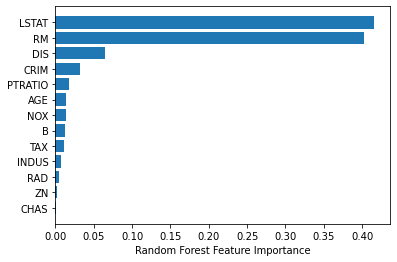

In [100]:
from matplotlib import pyplot as plt
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

LSTAT и RM показывают наибольшую важность